In [5]:
import Pkg
Pkg.activate("../../.")
include("../../LogLoss/RealRealHighDimension.jl")
include("../../Interpolation/ForecastingMainNew.jl");

  Activating project at `~/Desktop/QuantumInspiredML`


In [6]:
using Plots
using JLD2
using Random, Distributions
using StatsBase
using Plots.PlotMeasures
using ProgressMeter

In [17]:
svpath_ns = "/Users/joshua/Desktop/QuantumInspiredML/Data/NASA_KeplerV2/mps_saves/eb_legendre_ns_d12_chi80.jld2";
dloc =  "/Users/joshua/Desktop/QuantumInspiredML/Data/NASA_KeplerV2/datasets/contact_eb.jld2";

In [18]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)
fstyle = font("sans-serif", 23);

In [19]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 119 training samples and 52 testing samples.
 - 1 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 12, chi_max = 80

 Created 1 forecastable struct(s) containing class-wise mps and test samples.


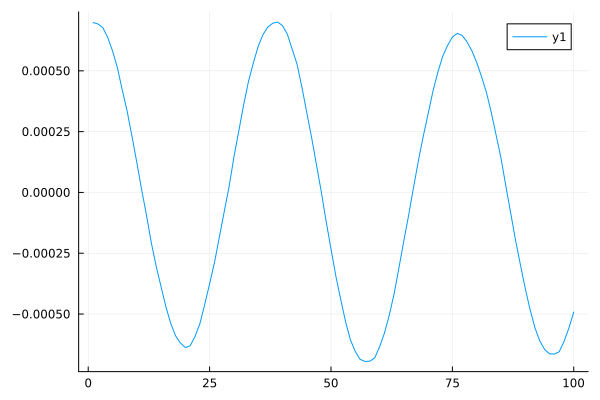

In [20]:
plot(X_test[1, :])

╭────────┬─────────────╮
│ Metric │       Value │
├────────┼─────────────┤
│    MAE │ 0.000899785 │
│ NN_MAE │ 0.000871179 │
╰────────┴─────────────╯


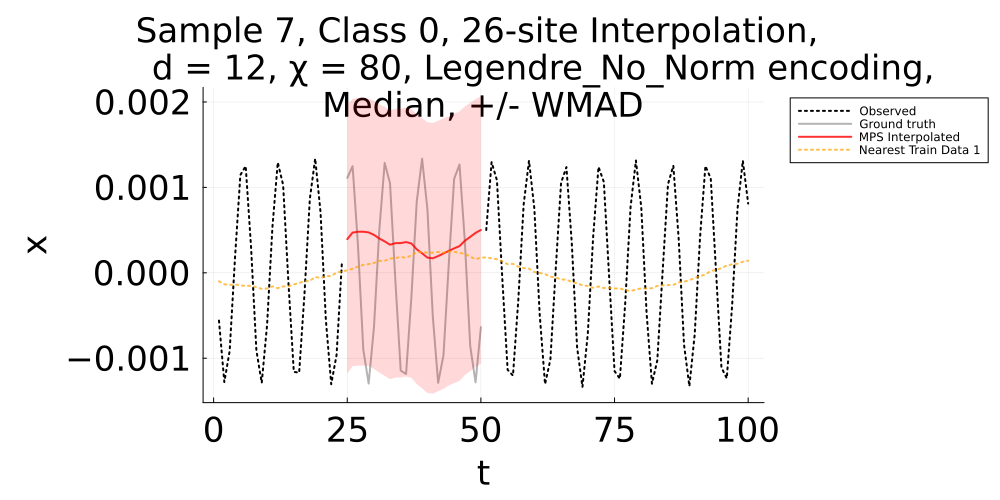

In [27]:
interp_sites = collect(25:50)
class = 0
stats, p1_ns = any_interpolate_median(fc, class, 7, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...,  xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    bottom_margin=10mm, 
    left_margin=10mm,
    xlabel="t")